In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,f_regression

In [88]:
import os
os.getcwd()

'C:\\Users\\achyu\\Learnbay\\ML Real Time Project\\Mechanical\\HVAC'

In [89]:
df1 = df.copy()
df1

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Floor_Level,Air_Leakage_Rate,Presence_of_Equipment,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM,Room_Type_Bedroom,Room_Type_Living Room,Room_Type_Office,Orientation_East,Orientation_North,Orientation_South,Orientation_West,Ventilation_Type_Mechanical,Ventilation_Type_Natural,Carpet_or_Tile_Carpet,Carpet_or_Tile_Tile,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,External_Shading_Full,External_Shading_Moderate,External_Shading_None,City_Chicago,City_Houston,City_Los Angeles,City_New York,City_Phoenix
0,437.086107,37.454043,39.256646,2,12.059887,34.117715,3.362551,1.032380,1877.059567,338.772903,4,0.332702,1,1,1,525.503338,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,955.642876,33.402409,57.095047,6,11.930392,43.068294,3.644057,1.196272,362.366558,273.464438,4,0.403491,0,0,1,343.687625,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,758.794548,27.738190,73.647292,5,11.924621,49.360527,1.313823,1.102692,1245.506806,237.544936,4,0.462034,0,1,0,909.933073,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
3,638.792636,40.344875,66.611244,9,12.224414,21.536218,3.177988,0.976918,445.352158,461.217142,4,0.146102,0,0,0,733.725414,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,240.416776,37.118279,70.328057,5,12.735276,48.445419,3.837283,1.082959,614.432834,36.367474,3,0.546864,0,0,0,343.834471,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,418.017005,22.289552,63.410640,7,14.300582,46.077608,3.478105,0.810308,786.294259,128.531346,7,0.770858,0,1,0,470.909223,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
496,625.290501,42.932839,60.974517,4,8.812973,42.267741,3.253581,1.041412,473.847988,232.518167,7,0.441060,0,0,1,1055.408162,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
497,169.961173,23.420466,53.174702,3,14.691432,49.394336,3.498456,1.063802,193.931342,113.489270,3,0.372491,0,1,0,231.884795,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
498,976.955327,43.755934,48.989289,8,10.197767,40.169930,4.457733,1.075218,358.063275,371.952594,7,0.513411,1,0,0,276.099989,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [90]:
df = pd.read_csv("D:\\Learnbay\\ML Real Time Project\\Mechanical\\HVAC\\air_conditioning_dataset_with_location.csv")
df.head(10)

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Room_Type,Floor_Level,Orientation,Ventilation_Type,Air_Leakage_Rate,Carpet_or_Tile,Presence_of_Equipment,Time_of_Day,External_Shading,City,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM
0,437.086107,37.454043,39.256646,2,12.059887,34.117715,3.362551,1.032380,1877.059567,338.772903,Living Room,4,South,Mechanical,0.332702,Carpet,1,Evening,Full,Phoenix,1,1,525.503338
1,955.642876,33.402409,57.095047,6,11.930392,43.068294,3.644057,1.196272,362.366558,273.464438,Bedroom,4,North,Mechanical,0.403491,Tile,0,Evening,None,Phoenix,0,1,343.687625
2,758.794548,27.738190,73.647292,5,11.924621,49.360527,1.313823,1.102692,1245.506806,237.544936,Bedroom,4,North,Natural,0.462034,Carpet,0,Evening,None,New York,1,0,909.933073
3,638.792636,40.344875,66.611244,9,12.224414,21.536218,3.177988,0.976918,445.352158,461.217142,Bedroom,4,West,Mechanical,0.146102,Carpet,0,Evening,Moderate,Chicago,0,0,733.725414
4,240.416776,37.118279,70.328057,5,12.735276,48.445419,3.837283,1.082959,614.432834,36.367474,Living Room,3,East,Natural,0.546864,Tile,0,Evening,Full,Chicago,0,0,343.834471
5,240.395068,24.065423,62.939168,2,13.634923,25.579276,1.669285,0.955692,1092.917083,140.300407,Bedroom,7,South,Natural,0.210987,Tile,1,Night,Moderate,Phoenix,0,0,209.241588
6,152.275251,42.773180,64.613828,5,9.888745,25.420476,4.122527,0.891550,834.386837,174.968927,Living Room,9,North,Natural,0.460873,Tile,0,Afternoon,None,Houston,0,1,1008.157049
7,879.558531,40.563431,72.459783,4,13.775346,23.615484,3.335091,1.038741,320.451202,391.212906,Office,5,East,Natural,0.415639,Carpet,0,Evening,Moderate,New York,1,1,376.194406
8,641.003511,43.744998,42.483400,7,11.487790,31.656304,4.808887,1.171273,341.872805,496.257310,Bedroom,4,East,Natural,0.795556,Tile,0,Night,Moderate,Houston,0,0,806.216642
9,737.265320,38.142988,54.471248,6,8.539408,16.165802,1.169689,1.171656,836.289576,120.335257,Living Room,2,West,Natural,0.822853,Carpet,1,Afternoon,None,Los Angeles,0,0,536.921913


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Room_Area_sqft                500 non-null    float64
 1   Outdoor_Temperature_C         500 non-null    float64
 2   Humidity_Percentage           500 non-null    float64
 3   Number_of_Occupants           500 non-null    int64  
 4   Ceiling_Height_ft             500 non-null    float64
 5   Window_Area_sqft              500 non-null    float64
 6   Wall_Insulation_Rating        500 non-null    float64
 7   HVAC_Efficiency_Rating        500 non-null    float64
 8   Appliance_Heat_Watts          500 non-null    float64
 9   Lighting_Heat_Watts           500 non-null    float64
 10  Room_Type                     500 non-null    object 
 11  Floor_Level                   500 non-null    int64  
 12  Orientation                   500 non-null    object 
 13  Venti

In [92]:
df.describe()

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Floor_Level,Air_Leakage_Rate,Presence_of_Equipment,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,548.705541,32.048785,55.877906,5.020000,11.452422,30.099529,2.988696,1.000208,948.960033,248.797278,4.970000,0.549963,0.474000,0.510000,0.448000,689.189059
std,268.819568,7.137336,14.859647,2.491589,2.001581,11.753739,1.135554,0.114878,573.482240,145.184475,2.531782,0.254336,0.499824,0.500401,0.497787,275.292254
min,104.555425,20.115801,30.246999,1.000000,8.010956,10.000465,1.007969,0.800261,0.061438,0.113519,1.000000,0.105278,0.000000,0.000000,0.000000,204.359580
25%,317.151722,25.727481,42.061402,3.000000,9.808572,20.566535,2.001361,0.901887,444.257938,122.717037,3.000000,0.340353,0.000000,0.000000,0.000000,464.399353
50%,561.847374,31.795539,56.986917,5.000000,11.467358,29.733573,3.059878,0.995020,954.255067,241.915690,5.000000,0.553976,0.000000,1.000000,0.000000,692.861487
75%,780.512393,38.158421,68.867188,7.000000,13.116929,40.659154,3.930831,1.101106,1385.242523,379.243115,7.000000,0.771095,1.000000,1.000000,1.000000,916.824841
max,993.668316,44.992942,79.970686,9.000000,14.988433,49.912834,4.995570,1.199823,1995.498778,498.474709,9.000000,0.998705,1.000000,1.000000,1.000000,1196.990503


In [93]:
duplicates = df[df.duplicated()]
duplicates

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Room_Type,Floor_Level,Orientation,Ventilation_Type,Air_Leakage_Rate,Carpet_or_Tile,Presence_of_Equipment,Time_of_Day,External_Shading,City,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM


In [94]:
df = df.drop_duplicates()

In [95]:
pd.set_option('display.max_columns',None)

In [96]:
numeric_features = df.select_dtypes(include = 'number').columns
cat_features = df.select_dtypes(include = 'object').columns

print(len(numeric_features),numeric_features)
print()
print(len(cat_features),cat_features)

16 Index(['Room_Area_sqft', 'Outdoor_Temperature_C', 'Humidity_Percentage',
       'Number_of_Occupants', 'Ceiling_Height_ft', 'Window_Area_sqft',
       'Wall_Insulation_Rating', 'HVAC_Efficiency_Rating',
       'Appliance_Heat_Watts', 'Lighting_Heat_Watts', 'Floor_Level',
       'Air_Leakage_Rate', 'Presence_of_Equipment', 'Above_Floor_AC',
       'Below_Floor_AC', 'Required_Conditioned_Air_CFM'],
      dtype='object')

7 Index(['Room_Type', 'Orientation', 'Ventilation_Type', 'Carpet_or_Tile',
       'Time_of_Day', 'External_Shading', 'City'],
      dtype='object')


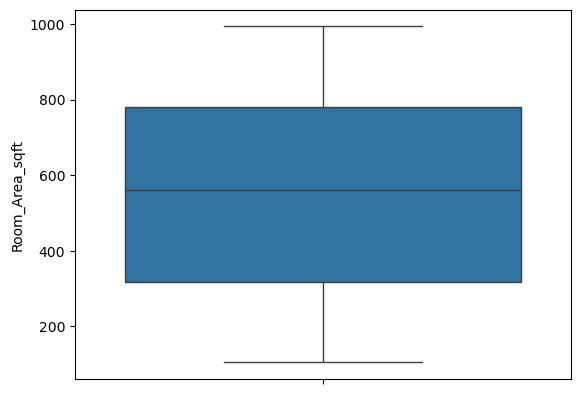

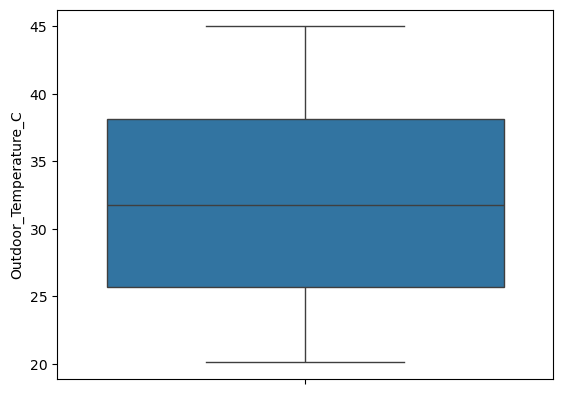

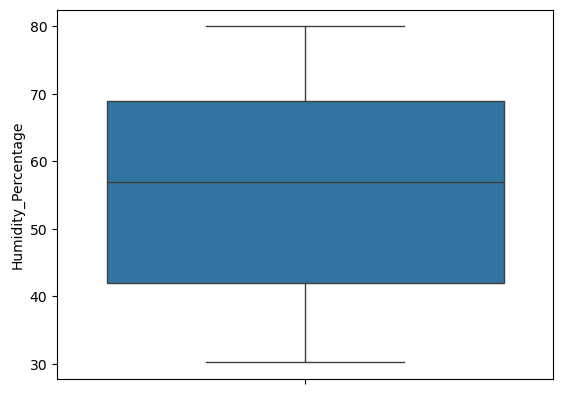

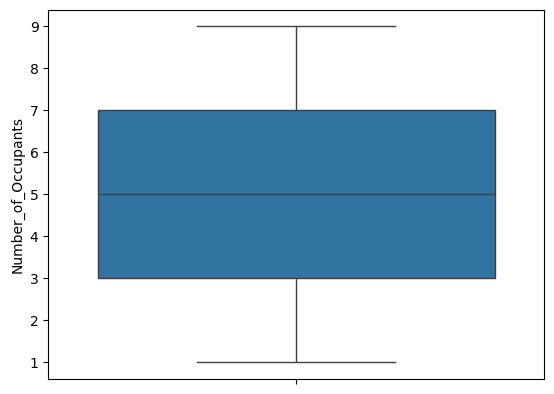

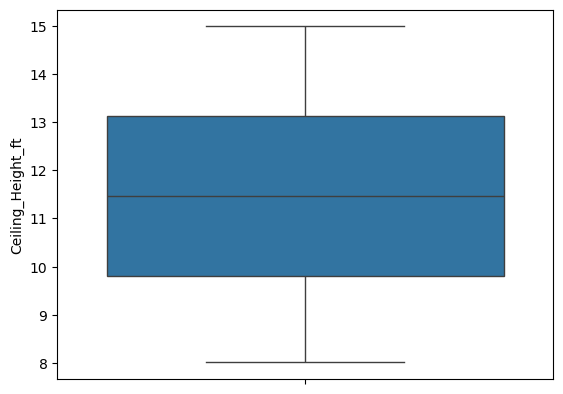

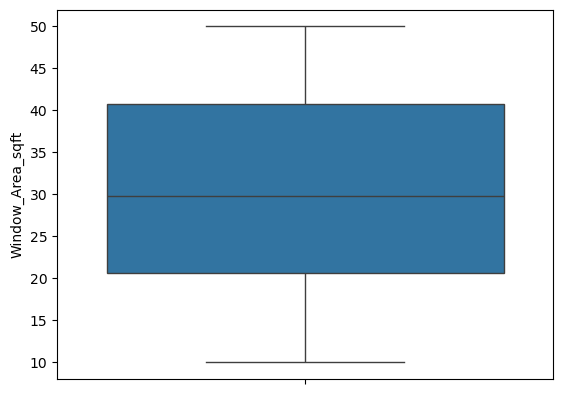

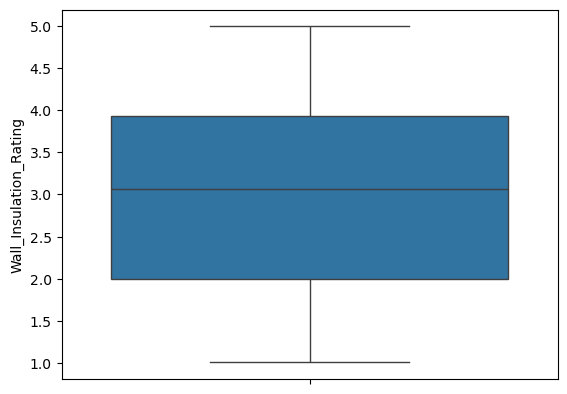

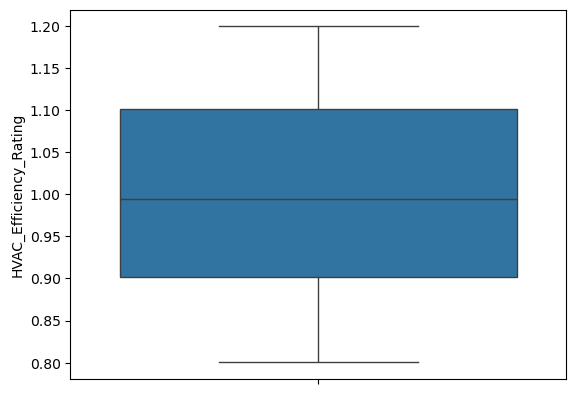

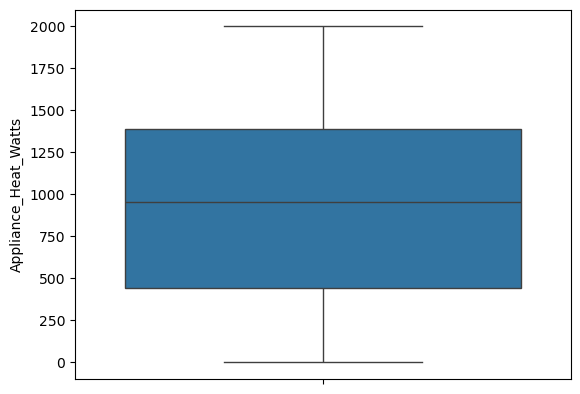

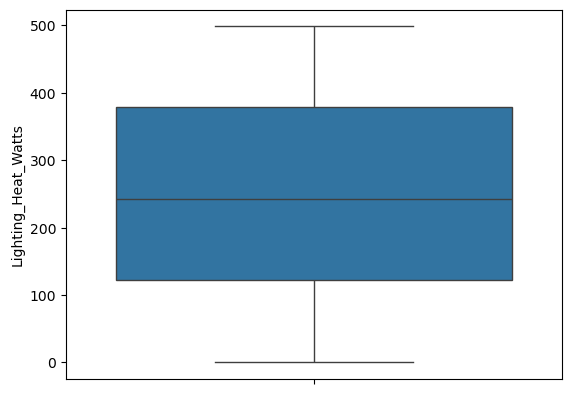

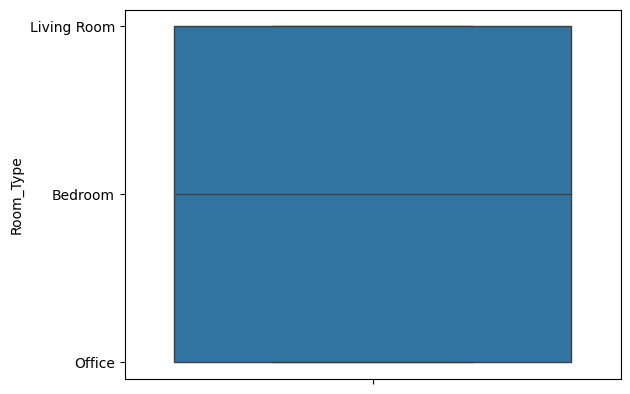

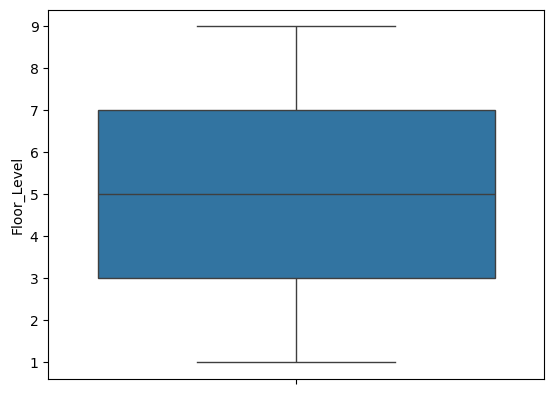

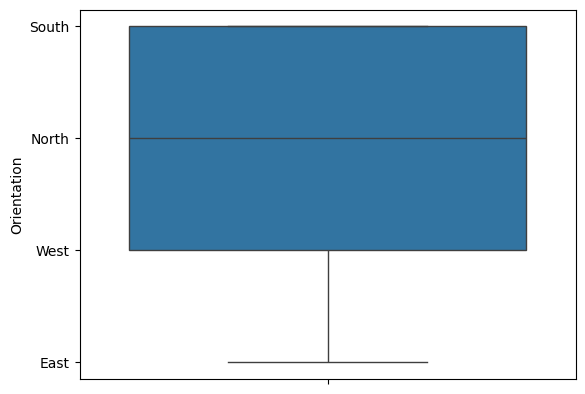

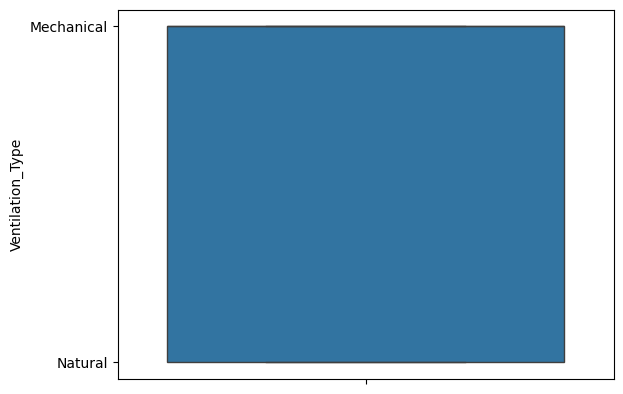

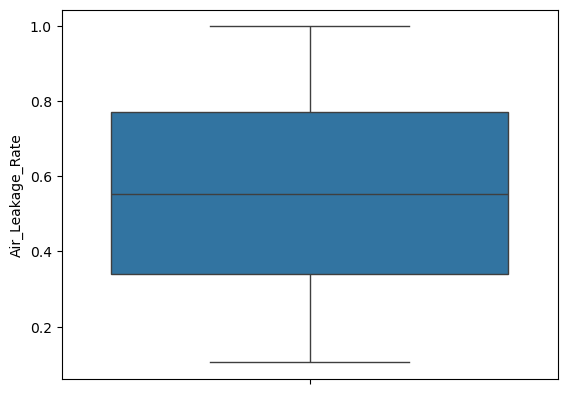

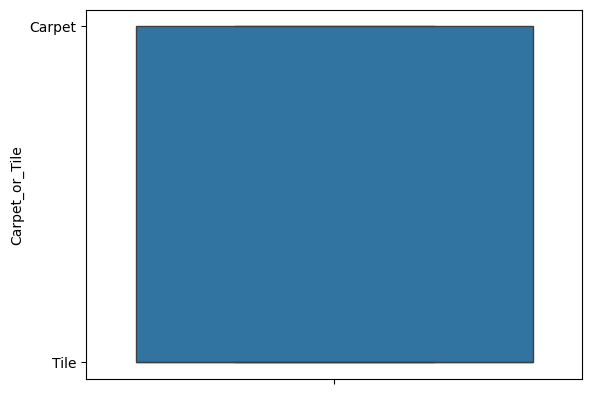

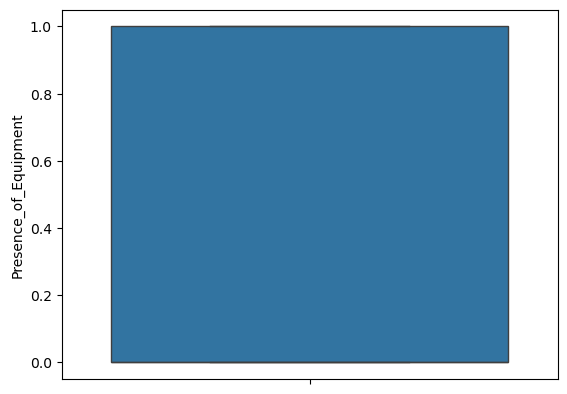

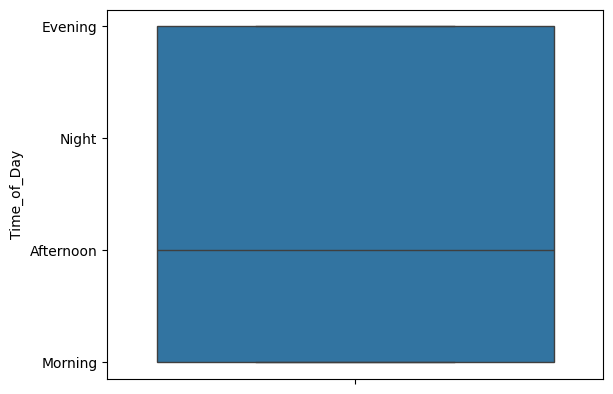

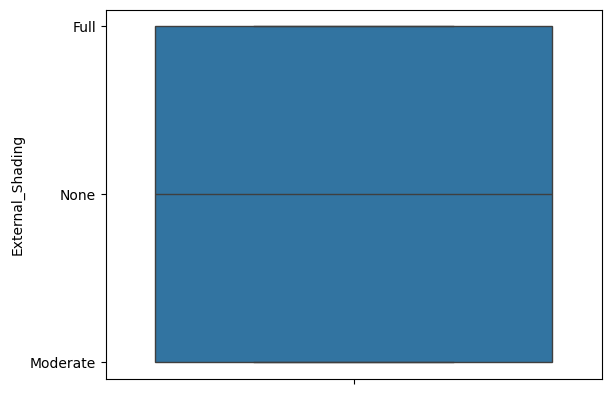

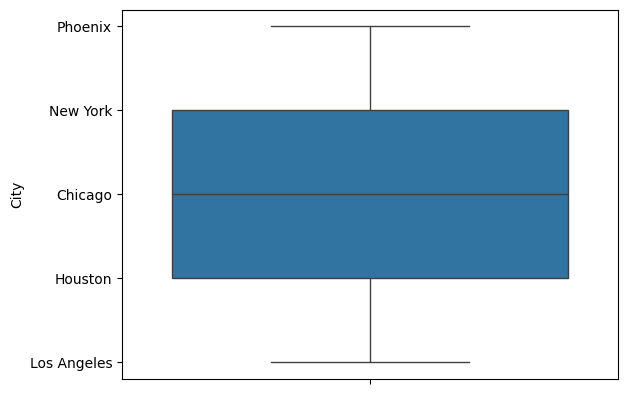

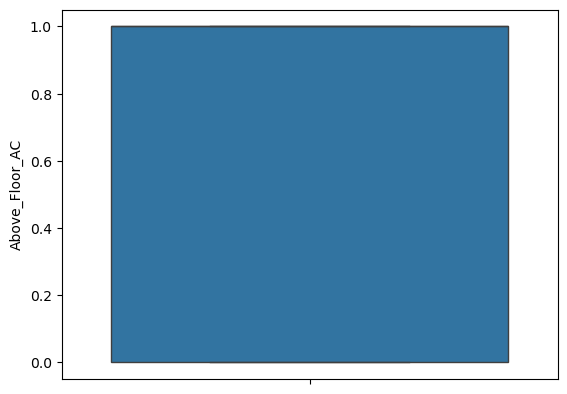

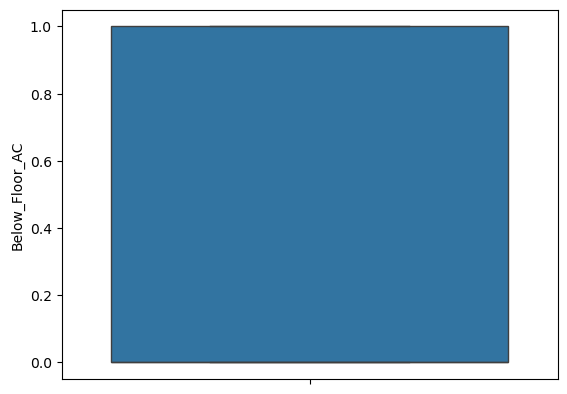

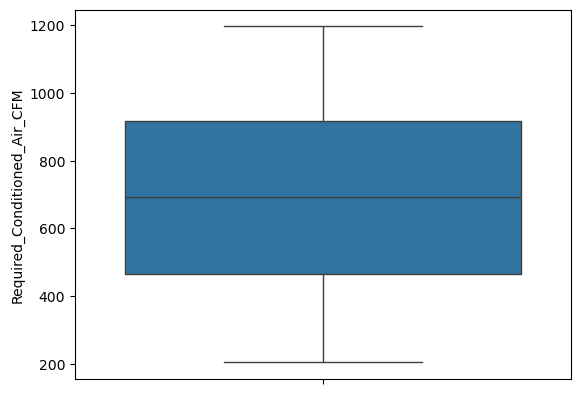

In [97]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for col in df:
    boxplot(col)

# Missing Values

In [98]:
# imputer = SimpleImputer(strategy = 'mean')
#df[['x','y']] = imputer.fit_transform(df[['x','y']])


# Encoding Values

In [99]:
cat_features

Index(['Room_Type', 'Orientation', 'Ventilation_Type', 'Carpet_or_Tile',
       'Time_of_Day', 'External_Shading', 'City'],
      dtype='object')

In [100]:
for col in cat_features:
    print("********************",col,"**************************")
    print()
    unique_values = set(df[col].tolist())
    print(unique_values)
    print()

******************** Room_Type **************************

{'Bedroom', 'Office', 'Living Room'}

******************** Orientation **************************

{'North', 'West', 'East', 'South'}

******************** Ventilation_Type **************************

{'Natural', 'Mechanical'}

******************** Carpet_or_Tile **************************

{'Tile', 'Carpet'}

******************** Time_of_Day **************************

{'Morning', 'Night', 'Evening', 'Afternoon'}

******************** External_Shading **************************

{'Full', 'Moderate', 'None'}

******************** City **************************

{'New York', 'Houston', 'Los Angeles', 'Chicago', 'Phoenix'}



In [101]:
frequency = df['Time_of_Day'].value_counts()
frequency

Morning      139
Evening      127
Afternoon    119
Night        115
Name: Time_of_Day, dtype: int64

In [102]:
frequency = df['Time_of_Day'].value_counts(normalize = True)
frequency

Morning      0.278
Evening      0.254
Afternoon    0.238
Night        0.230
Name: Time_of_Day, dtype: float64

In [103]:
# import category_encoders as ce
#encoder = ce.BinaryEncoder(cols = ['category'])
#df_encoded = encoder.fit_transform(df)
#df_encoded

In [105]:
label = LabelEncoder()
col_to_encode = ['Room_Type', 'Orientation', 'Ventilation_Type', 'Carpet_or_Tile',
       'Time_of_Day', 'External_Shading', 'City']

for col in col_to_encode:
    df[col] = label.fit_transform(df[col])
df

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Room_Type,Floor_Level,Orientation,Ventilation_Type,Air_Leakage_Rate,Carpet_or_Tile,Presence_of_Equipment,Time_of_Day,External_Shading,City,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM
0,437.086107,37.454043,39.256646,2,12.059887,34.117715,3.362551,1.032380,1877.059567,338.772903,1,4,2,0,0.332702,0,1,1,0,4,1,1,525.503338
1,955.642876,33.402409,57.095047,6,11.930392,43.068294,3.644057,1.196272,362.366558,273.464438,0,4,1,0,0.403491,1,0,1,2,4,0,1,343.687625
2,758.794548,27.738190,73.647292,5,11.924621,49.360527,1.313823,1.102692,1245.506806,237.544936,0,4,1,1,0.462034,0,0,1,2,3,1,0,909.933073
3,638.792636,40.344875,66.611244,9,12.224414,21.536218,3.177988,0.976918,445.352158,461.217142,0,4,3,0,0.146102,0,0,1,1,0,0,0,733.725414
4,240.416776,37.118279,70.328057,5,12.735276,48.445419,3.837283,1.082959,614.432834,36.367474,1,3,0,1,0.546864,1,0,1,0,0,0,0,343.834471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,418.017005,22.289552,63.410640,7,14.300582,46.077608,3.478105,0.810308,786.294259,128.531346,2,7,3,0,0.770858,0,0,1,0,2,1,0,470.909223
496,625.290501,42.932839,60.974517,4,8.812973,42.267741,3.253581,1.041412,473.847988,232.518167,0,7,1,1,0.441060,1,0,2,0,2,0,1,1055.408162
497,169.961173,23.420466,53.174702,3,14.691432,49.394336,3.498456,1.063802,193.931342,113.489270,1,3,1,0,0.372491,1,0,2,1,0,1,0,231.884795
498,976.955327,43.755934,48.989289,8,10.197767,40.169930,4.457733,1.075218,358.063275,371.952594,0,7,0,1,0.513411,1,1,1,1,1,0,0,276.099989


# Outlier Treatment

# Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_df = mms.fit_transform(df)
scaled_df1 = pd.DataFrame(data = scaled_df,columns = df.columns)
scaled_df1

,Room_Area_sqft,Outdoor_Temperature_C,Humidity_Percentage,Number_of_Occupants,Ceiling_Height_ft,Window_Area_sqft,Wall_Insulation_Rating,HVAC_Efficiency_Rating,Appliance_Heat_Watts,Lighting_Heat_Watts,Room_Type,Floor_Level,Orientation,Ventilation_Type,Air_Leakage_Rate,Carpet_or_Tile,Presence_of_Equipment,Time_of_Day,External_Shading,City,Above_Floor_AC,Below_Floor_AC,Required_Conditioned_Air_CFM
0,0.374003,0.696955,0.181194,0.125,0.580286,0.604255,0.590476,0.580934,0.940645,0.679546,0.5,0.375,0.666667,0.0,0.254552,0.0,1.0,0.333333,0.0,1.00,1.0,1.0,0.323528
1,0.957232,0.534089,0.539945,0.625,0.561727,0.828511,0.661071,0.991112,0.181567,0.548500,0.0,0.375,0.333333,0.0,0.333786,1.0,0.0,0.333333,1.0,1.00,0.0,1.0,0.140362
2,0.735834,0.306401,0.872829,0.500,0.560900,0.986162,0.076701,0.756906,0.624147,0.476424,0.0,0.375,0.333333,1.0,0.399312,0.0,0.0,0.333333,1.0,0.75,1.0,0.0,0.710812
3,0.600865,0.813159,0.731326,1.000,0.603866,0.289027,0.544192,0.442125,0.223154,0.925240,0.0,0.375,1.000000,0.0,0.045693,0.0,0.0,0.333333,0.5,0.00,0.0,0.0,0.533296
4,0.152806,0.683458,0.806076,0.500,0.677081,0.963234,0.709528,0.707519,0.307888,0.072746,0.5,0.250,0.000000,1.0,0.494261,1.0,0.0,0.333333,0.0,0.00,0.0,0.0,0.140510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.352555,0.087379,0.666959,0.750,0.901418,0.903909,0.619454,0.025144,0.394015,0.257680,1.0,0.750,1.000000,0.0,0.744974,0.0,0.0,0.333333,0.0,0.50,1.0,0.0,0.268528
496,0.585679,0.917189,0.617965,0.375,0.114944,0.808453,0.563149,0.603537,0.237435,0.466338,0.0,0.750,0.333333,1.0,0.375836,1.0,0.0,0.666667,0.0,0.50,0.0,1.0,0.857367
497,0.073563,0.132839,0.461102,0.250,0.957434,0.987009,0.624558,0.659575,0.097157,0.227497,0.5,0.250,0.333333,0.0,0.299087,1.0,0.0,0.666667,0.5,0.00,1.0,0.0,0.027730
498,0.981203,0.950275,0.376929,0.875,0.313410,0.755893,0.865123,0.688146,0.179410,0.746124,0.0,0.750,0.000000,1.0,0.456818,1.0,1.0,0.333333,0.5,0.25,0.0,0.0,0.072273


In [107]:
x = df.drop(['Required_Conditioned_Air_CFM'],axis =1)
y = df[['Required_Conditioned_Air_CFM']]

In [108]:
y

,Required_Conditioned_Air_CFM
0,525.503338
1,343.687625
2,909.933073
3,733.725414
4,343.834471
...,...
495,470.909223
496,1055.408162
497,231.884795
498,276.099989


In [109]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state = 42)

# Linear Regression

In [111]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred_reg_train = reg_model.predict(x_train)
y_pred_reg_test = reg_model.predict(x_test)

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [115]:
train_mae = mean_absolute_error(y_train,y_pred_reg_train)
test_mae = mean_absolute_error(y_test,y_pred_reg_test)

print(train_mae)
print(test_mae)

220.87358084879975
251.43924821452583


In [116]:
train_mse = mean_squared_error(y_train,y_pred_reg_train)
test_mse = mean_squared_error(y_test,y_pred_reg_test)

print(train_mse)
print(test_mse)

68527.99592726449
88033.39686969786


In [118]:
r2_reg_train = r2_score(y_train,y_pred_reg_train)
r2_reg_test = r2_score(y_test,y_pred_reg_test)

print(r2_reg_train)
print(r2_reg_test)

0.09017500120463262
-0.20339809394156205


# Random Forest Regressor

In [121]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [124]:
rf_train_mae = mean_absolute_error(y_train,y_pred_rf_train)
rf_test_mae = mean_absolute_error(y_test,y_pred_rf_test)

print(rf_train_mae)
print(rf_test_mae)

87.97373031117748
251.11466776062002


In [126]:
rf_train_mse = mean_squared_error(y_train,y_pred_rf_train)
rf_test_mse = mean_squared_error(y_test,y_pred_rf_test)

print(rf_train_mse)
print(rf_test_mse)

10767.039649360848
89995.44315991204


In [127]:
r2_reg_train = r2_score(y_train,y_pred_rf_train)
r2_reg_test = r2_score(y_test,y_pred_rf_test)

print(r2_reg_train)
print(r2_reg_test)

0.8570493459869015
-0.2302188557186371


In [130]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Importance':rf_model.feature_importances_}).sort_values(by ="Importance",ascending =False) 
feature_importance

,Feature,Importance
14,Air_Leakage_Rate,0.099925
9,Lighting_Heat_Watts,0.097595
5,Window_Area_sqft,0.081651
1,Outdoor_Temperature_C,0.077651
2,Humidity_Percentage,0.075897
6,Wall_Insulation_Rating,0.072496
7,HVAC_Efficiency_Rating,0.070514
8,Appliance_Heat_Watts,0.069867
4,Ceiling_Height_ft,0.067258
0,Room_Area_sqft,0.066061


In [137]:
selector = SelectKBest(score_func = f_regression,k = 15)
x_selected = selector.fit_transform(x,y)
selected_features = x.columns[selector.get_support()]

In [138]:
print(selected_features)

Index(['Room_Area_sqft', 'Outdoor_Temperature_C', 'Humidity_Percentage',
       'Number_of_Occupants', 'Window_Area_sqft', 'Lighting_Heat_Watts',
       'Room_Type', 'Floor_Level', 'Orientation', 'Ventilation_Type',
       'Air_Leakage_Rate', 'Presence_of_Equipment', 'Time_of_Day',
       'External_Shading', 'Above_Floor_AC'],
      dtype='object')


In [139]:
x_train,x_test,y_train,y_test =train_test_split(x_selected,y,test_size =0.2,random_state = 42)

In [140]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [141]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [142]:
rf_train_mae = mean_absolute_error(y_train,y_pred_rf_train)
rf_test_mae = mean_absolute_error(y_test,y_pred_rf_test)

print(rf_train_mae)
print(rf_test_mae)

88.54526664469999
240.76919531369


In [143]:
r2_reg_train = r2_score(y_train,y_pred_rf_train)
r2_reg_test = r2_score(y_test,y_pred_rf_test)

print(r2_reg_train)
print(r2_reg_test)

0.8533595431400984
-0.184338460928277


In [144]:
r2_reg_train = r2_score(y_train,y_pred_rf_train)
r2_reg_test = r2_score(y_test,y_pred_rf_test)

print(r2_reg_train)
print(r2_reg_test)

0.8533595431400984
-0.184338460928277


# Grid Search CV

In [147]:
param_grid = {'n_estimators':[50,100,150],
              'max_depth' : [10,20],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

grid_search = GridSearchCV(estimator = rf_model,param_grid = param_grid)
grid_search.fit(x_train,y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [150]:
grid_best_model = grid_search.best_estimator_
y_pred_grid = grid_best_model.predict(x_test)
grid_r2 =r2_score(y_test,y_pred_grid)
grid_r2

-0.1654621229999067

In [151]:
random_search = RandomizedSearchCV(estimator = rf_model,param_distributions = param_grid,
                                  n_iter = 10,cv = 3,scoring = 'r2')
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='r2')

In [152]:
random_best_model = random_search.best_estimator_
y_pred_random = random_best_model.predict(x_test)
random_r2 = r2_score(y_test,y_pred_random)
random_r2

-0.17290521580729568